In [17]:
import sys
import os
import json
from statistics import mean

sys.path.append(os.path.join(os.getcwd(), ".."))

from Extra.utils import parse_xml, translate_coco_to_images_net, clear_directory, find_xml_file, calculate_iou, get_scores
from PIL import Image, ImageDraw

import matplotlib.pyplot as plt
import numpy as np

In [4]:
score_export_folder_path = "../../output/scores/"

# Specify the file path where you saved the exported dictionary
yolo_dog_path = score_export_folder_path + "yolo_dog_opencv_scores.json"
yolo_car_path = score_export_folder_path + "yolo_car_opencv_scores.json"
yolo_apple_path = score_export_folder_path + "yolo_apple_opencv_scores.json"
faster_rcnn_dog_path = score_export_folder_path + "faster_rcnn_dog_pytorch_scores.json"
faster_rcnn_car_path = score_export_folder_path + "faster_rcnn_car_pytorch_scores.json"
faster_rcnn_apple_path = score_export_folder_path + "faster_rcnn_apple_pytorch_scores.json"

# Read the dictionary from the JSON file
with open(yolo_dog_path, 'r') as file:
    yolo_dog = json.load(file)
with open(yolo_car_path, 'r') as file:
    yolo_car = json.load(file)
with open(yolo_apple_path, 'r') as file:
    yolo_apple = json.load(file)
with open(faster_rcnn_dog_path, 'r') as file:
    faster_rcnn_dog = json.load(file)
with open(faster_rcnn_car_path, 'r') as file:
    faster_rcnn_car = json.load(file)
with open(faster_rcnn_apple_path, 'r') as file:
    faster_rcnn_apple = json.load(file)

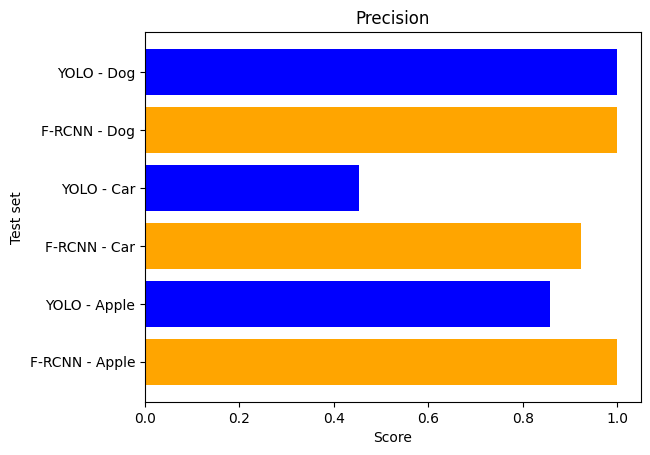

In [15]:
values = [yolo_dog["precision"], faster_rcnn_dog["precision"], yolo_car["precision"], faster_rcnn_car["precision"], yolo_apple["precision"], faster_rcnn_apple["precision"]]
values.reverse()

# Your category names
categories = ['YOLO - Dog', 'F-RCNN - Dog', 'YOLO - Car', 'F-RCNN - Car', 'YOLO - Apple', 'F-RCNN - Apple']
categories.reverse()

# Set colors for the top 3 and bottom 3
colors = ['orange', 'blue'] * 3

# Create the horizontal bar chart
plt.barh(categories, values, color=colors)

# Set labels and title
plt.xlabel('Score')
plt.ylabel('Test set')
plt.title('Precision')

# Show the plot
plt.show()

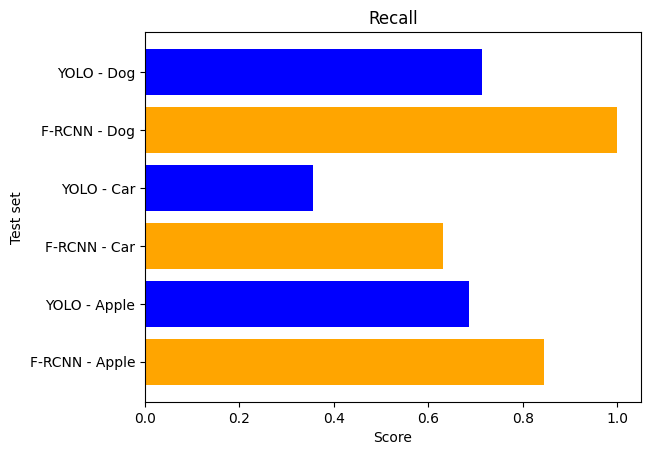

In [16]:
values = [yolo_dog["recall"], faster_rcnn_dog["recall"], yolo_car["recall"], faster_rcnn_car["recall"], yolo_apple["recall"], faster_rcnn_apple["recall"]]
values.reverse()

# Your category names
categories = ['YOLO - Dog', 'F-RCNN - Dog', 'YOLO - Car', 'F-RCNN - Car', 'YOLO - Apple', 'F-RCNN - Apple']
categories.reverse()

# Set colors for the top 3 and bottom 3
colors = ['orange', 'blue'] * 3

# Create the horizontal bar chart
plt.barh(categories, values, color=colors)

# Set labels and title
plt.xlabel('Score')
plt.ylabel('Test set')
plt.title('Recall')

# Show the plot
plt.show()

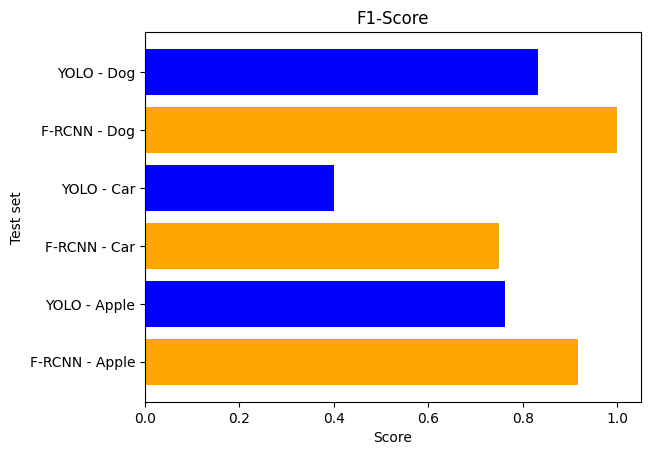

In [14]:
values = [yolo_dog["f1"], faster_rcnn_dog["f1"], yolo_car["f1"], faster_rcnn_car["f1"], yolo_apple["f1"], faster_rcnn_apple["f1"]]
values.reverse()

# Your category names
categories = ['YOLO - Dog', 'F-RCNN - Dog', 'YOLO - Car', 'F-RCNN - Car', 'YOLO - Apple', 'F-RCNN - Apple']
categories.reverse()

# Set colors for the top 3 and bottom 3
colors = ['orange', 'blue'] * 3

# Create the horizontal bar chart
plt.barh(categories, values, color=colors)

# Set labels and title
plt.xlabel('Score')
plt.ylabel('Test set')
plt.title('F1-Score')

# Show the plot
plt.show()

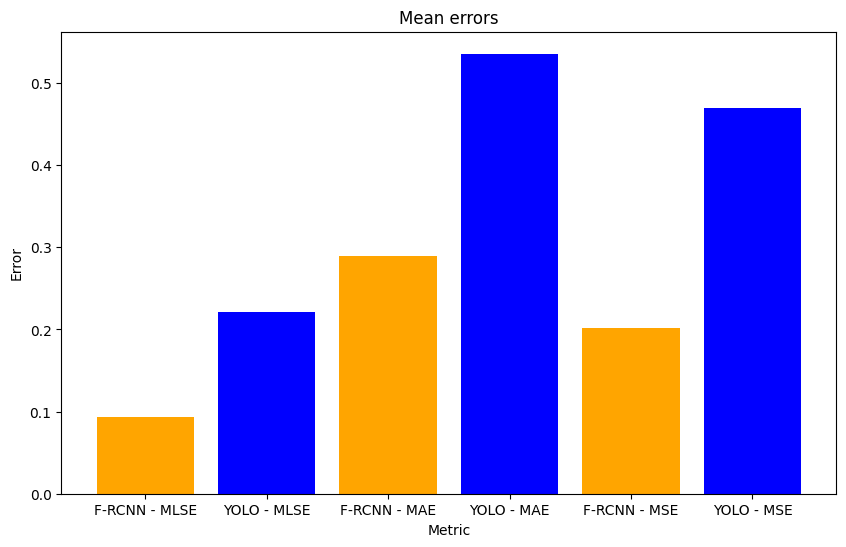

In [21]:
yolo_mse = [yolo_dog["mse"], yolo_car["mse"], yolo_apple["mse"]]
yolo_mae = [yolo_dog["mae"], yolo_car["mae"], yolo_apple["mae"]]
yolo_mlse = [yolo_dog["mlse"], yolo_car["mlse"], yolo_apple["mlse"]]
yolo_mean_mse = mean(yolo_mse)
yolo_mean_mae = mean(yolo_mae)
yolo_mean_mlse = mean(yolo_mlse)

faster_rcnn_mse = [faster_rcnn_dog["mse"], faster_rcnn_car["mse"], faster_rcnn_apple["mse"]]
faster_rcnn_mae = [faster_rcnn_dog["mae"], faster_rcnn_car["mae"], faster_rcnn_apple["mae"]]
faster_rcnn_mlse = [faster_rcnn_dog["mlse"], faster_rcnn_car["mlse"], faster_rcnn_apple["mlse"]]
faster_rcnn_mean_mse = mean(faster_rcnn_mse)
faster_rcnn_mean_mae = mean(faster_rcnn_mae)
faster_rcnn_mean_mlse = mean(faster_rcnn_mlse)

values = [yolo_mean_mse, faster_rcnn_mean_mse, yolo_mean_mae, faster_rcnn_mean_mae, yolo_mean_mlse, faster_rcnn_mean_mlse]
values.reverse()

# Your category names
categories = ['YOLO - MSE', 'F-RCNN - MSE', 'YOLO - MAE', 'F-RCNN - MAE', 'YOLO - MLSE', 'F-RCNN - MLSE']
categories.reverse()

# Set colors for the top 3 and bottom 3
colors = ['orange', 'blue'] * 3

# Set the plot size (adjust the width and height as needed)
fig, ax = plt.subplots(figsize=(10, 6))

# Create the horizontal bar chart
plt.bar(categories, values, color=colors)

# Set labels and title
plt.xlabel('Metric')
plt.ylabel('Error')
plt.title('Mean errors')

# Show the plot
plt.show()